In [47]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [49]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
df_dummies = pd.get_dummies(df)

In [51]:
print(df_dummies.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...    day_of_week_fri  \
0          -36.4      4.857       5191.0  ...                  0   
1          -36.4      4.857       5191.0  ...                  0   
2          -36.4      4.857       5191.0  ...                  0   
3          -36.4      4.857       5191.0  ...                  0   
4          -36.4      4.857       5191.0  ...                  0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1                0                0   

In [52]:
df_copy = df_dummies.copy()

In [53]:
del df_copy["y_no"]

In [54]:
del df_copy["duration"]

In [55]:
df_copy.head()
features = list(df_copy.columns.values)

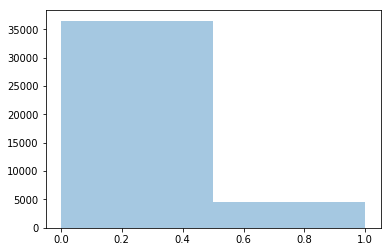

In [56]:
df_copyt = df_copy.transpose()
yd=df_dummies["y_yes"].values
sns_plot = sns.distplot(yd,bins=2, kde = False, rug = False).get_figure()

# sns.distplot(y, kde=False, rug=True)

sns_plot.savefig("histogram_y_yes.png",bbox_inches='tight')
sns_plot.savefig("histogram_y_yes.pdf",bbox_inches='tight')

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

y = df_copy['y_yes'].values
df_copy2 = df_copy.copy()
del df_copy2['y_yes']
X = df_copy2.values

clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)

dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y,dummy_clf.predict(X))))

ACC: 0.80 (+/- 0.17)
Dummy ACC: 0.80


In [68]:
clf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
importances = clf.feature_importances_
print(len(clf.estimators_))
indices = np.argsort(importances)[::-1]
print (indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

100
[ 2 61  8  7  4 60 49  6 42 43 52  3 59 50  5 53  0 34 48 33 10 46 17 44
 51 14 55 47 45 27 23  1 57 31 22 32 54 16 58 28 20 18 56 38 11 36 39  9
 26 41 40 25 37 15 21 30 12 13 29 24 19 35]
Feature ranking:
1. pdays (0.159017)
2. poutcome_success (0.152372)
3. nr.employed (0.126142)
4. euribor3m (0.121699)
5. emp.var.rate (0.098123)
6. poutcome_nonexistent (0.042767)
7. month_mar (0.034227)
8. cons.conf.idx (0.031934)
9. contact_cellular (0.031427)
10. contact_telephone (0.022768)
11. month_oct (0.022268)
12. previous (0.021996)
13. poutcome_failure (0.021759)
14. month_may (0.017568)
15. cons.price.idx (0.014677)
16. month_sep (0.013934)
17. age (0.009337)
18. default_unknown (0.008641)
19. month_jun (0.008577)
20. default_no (0.006662)
21. job_blue-collar (0.005607)
22. month_dec (0.004597)
23. job_student (0.004032)
24. month_apr (0.003814)
25. month_nov (0.002494)
26. job_retired (0.002416)
27. day_of_week_mon (0.001619)
28. month_jul (0.001516)
29. month_aug (0.001218)
30. edu

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
print(cnf_matrix)

[[36350   198]
 [ 3988   652]]
